<h1>SVM classifier</h1>...but can be used for regression and clustering.
Good for small datasets, not efficient computationaly.

In [1]:
import pandas as pd
df=pd.read_csv("teleCust1000t.csv")
# df.head()

In [2]:
X=df[df.columns[:-1]].values
Y=df[df.columns[-1]].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [3]:
from sklearn import svm

# svm_clf=svm.SVC(kernel="rbf") #0.365 accuracy_score  #0.625
svm_clf=svm.SVC(kernel="linear") #0.425 accuracy_score #0.625 #dtree 0.975
# svm_clf=svm.SVC(kernel="poly") #0.335 knn   #0.625 logisticRegression
# svm_clf=svm.SVC(kernel="sigmoid") #0.26 knn  #0.725 logisticRegression

# kernel="linear" working better than knn and decision tree ...//For categorical values
#kernel="sigmoid" working better than logisticRegression //Two target values..and numerical independent variable

svm_clf.fit(X_train,Y_train)
Yhat=svm_clf.predict(X_test)

In [4]:
#here svm working less better than decision tree and knn
from sklearn.metrics import accuracy_score
accuracy_score_svm=accuracy_score(Y_test,Yhat)
print("Accuracy score of svm for classifying custcat is :", accuracy_score_svm)

Accuracy score of svm for classifying custcat is : 0.425


In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Text(0.5, 15.0, 'Predicted Lables')

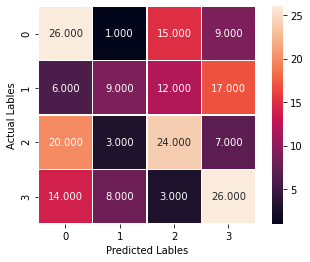

In [6]:
#svm with linear kernel predicting better drug than decision tree
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Yhat)
cm

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="0.3f",linewidths=0.5,square=True)
plt.ylabel("Actual Lables")
plt.xlabel("Predicted Lables")